In [68]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [69]:
df_sugar = pd.read_csv ('../data/psd_sugar.csv')

In [70]:
df_sugar.head()

,Commodity_Code,Commodity_Description,Country_Code,Country_Name,Market_Year,Calendar_Year,Month,Attribute_ID,Attribute_Description,Unit_ID,Unit_Description,Value
0,612000,"Sugar, Centrifugal",AF,Afghanistan,1973,1972,0,30,Beet Sugar Production,8,(1000 MT),0.0
1,612000,"Sugar, Centrifugal",AF,Afghanistan,1973,1972,0,20,Beginning Stocks,8,(1000 MT),0.0
2,612000,"Sugar, Centrifugal",AF,Afghanistan,1973,1972,0,43,Cane Sugar Production,8,(1000 MT),10.0
3,612000,"Sugar, Centrifugal",AF,Afghanistan,1973,1972,0,176,Ending Stocks,8,(1000 MT),10.0
4,612000,"Sugar, Centrifugal",AF,Afghanistan,1973,1972,0,88,Exports,8,(1000 MT),0.0


In [71]:
df_sugar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138768 entries, 0 to 138767
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Commodity_Code         138768 non-null  int64  
 1   Commodity_Description  138768 non-null  object 
 2   Country_Code           137984 non-null  object 
 3   Country_Name           138768 non-null  object 
 4   Market_Year            138768 non-null  int64  
 5   Calendar_Year          138768 non-null  int64  
 6   Month                  138768 non-null  int64  
 7   Attribute_ID           138768 non-null  int64  
 8   Attribute_Description  138768 non-null  object 
 9   Unit_ID                138768 non-null  int64  
 10  Unit_Description       138768 non-null  object 
 11  Value                  138768 non-null  float64
dtypes: float64(1), int64(6), object(5)
memory usage: 12.7+ MB


## Let's look at the consumption only

In [72]:
df_sugar_cons = df_sugar[df_sugar['Attribute_Description'] == 'Human Dom. Consumption']

In [73]:
df_sugar_cons.head()

,Commodity_Code,Commodity_Description,Country_Code,Country_Name,Market_Year,Calendar_Year,Month,Attribute_ID,Attribute_Description,Unit_ID,Unit_Description,Value
5,612000,"Sugar, Centrifugal",AF,Afghanistan,1973,1972,0,139,Human Dom. Consumption,8,(1000 MT),0.0
21,612000,"Sugar, Centrifugal",AF,Afghanistan,1974,1973,0,139,Human Dom. Consumption,8,(1000 MT),60.0
37,612000,"Sugar, Centrifugal",AF,Afghanistan,1975,1974,0,139,Human Dom. Consumption,8,(1000 MT),60.0
53,612000,"Sugar, Centrifugal",AF,Afghanistan,1976,1975,0,139,Human Dom. Consumption,8,(1000 MT),55.0
69,612000,"Sugar, Centrifugal",AF,Afghanistan,1977,1976,0,139,Human Dom. Consumption,8,(1000 MT),60.0


## Let's look at the consumption of sugar in the US from 1973 - 2021

In [74]:
df_sugar_cons_USA = df_sugar_cons[df_sugar_cons['Country_Name'] == 'United States']
df_sugar_cons_USA.head()

,Commodity_Code,Commodity_Description,Country_Code,Country_Name,Market_Year,Calendar_Year,Month,Attribute_ID,Attribute_Description,Unit_ID,Unit_Description,Value
130725,612000,"Sugar, Centrifugal",US,United States,1960,1959,0,139,Human Dom. Consumption,8,(1000 MT),8671.0
130741,612000,"Sugar, Centrifugal",US,United States,1961,1960,0,139,Human Dom. Consumption,8,(1000 MT),8868.0
130757,612000,"Sugar, Centrifugal",US,United States,1962,1961,0,139,Human Dom. Consumption,8,(1000 MT),9106.0
130773,612000,"Sugar, Centrifugal",US,United States,1963,1962,0,139,Human Dom. Consumption,8,(1000 MT),9150.0
130789,612000,"Sugar, Centrifugal",US,United States,1964,1963,0,139,Human Dom. Consumption,8,(1000 MT),9194.0


In [75]:
df_sugar_cons_USA.isnull().sum()

Commodity_Code           0
Commodity_Description    0
Country_Code             0
Country_Name             0
Market_Year              0
Calendar_Year            0
Month                    0
Attribute_ID             0
Attribute_Description    0
Unit_ID                  0
Unit_Description         0
Value                    0
dtype: int64

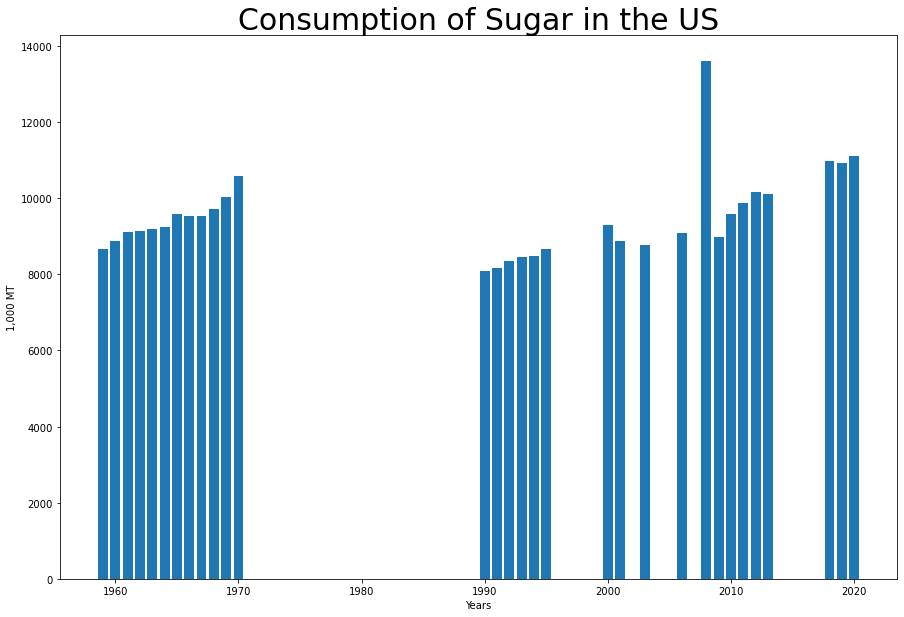

In [76]:
plt.bar(df_sugar_cons_USA.Calendar_Year, df_sugar_cons_USA.Value, linewidth=2)
plt.rcParams["figure.figsize"] = [15,10]
#plt.xticks(range(30))
plt.xlabel('Years')
plt.ylabel('1,000 MT')
plt.title('Consumption of Sugar in the US', size = 30)
plt.show()

## Let's look at the unique countries

In [77]:
list(df_sugar_cons['Country_Name'].unique())

['Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas, The',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belize',
 'Benin',
 'Bermuda',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina',
 'Burma',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Djibouti',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'EU-15',
 'EU-25',
 'European Union',
 'Fiji',
 'Finland',
 'Former Czechoslovakia',
 'Former Yugoslavia',
 'Fr.Ter.Africa-Issas',
 'France',
 'French Polynesia',
 'French West Indies',
 'Gabon',
 'Gambia, The',
 'Georgia',
 'German Democratic Republic',
 'Germany, Fede

## let's look at France

In [78]:
df_sugar_cons_FR = df_sugar_cons[df_sugar_cons['Country_Name'] == 'France']
df_sugar_cons_FR.head()

,Commodity_Code,Commodity_Description,Country_Code,Country_Name,Market_Year,Calendar_Year,Month,Attribute_ID,Attribute_Description,Unit_ID,Unit_Description,Value
45845,612000,"Sugar, Centrifugal",FR,France,1960,1959,0,139,Human Dom. Consumption,8,(1000 MT),0.0
45861,612000,"Sugar, Centrifugal",FR,France,1961,1960,0,139,Human Dom. Consumption,8,(1000 MT),0.0
45877,612000,"Sugar, Centrifugal",FR,France,1962,1961,0,139,Human Dom. Consumption,8,(1000 MT),0.0
45893,612000,"Sugar, Centrifugal",FR,France,1964,1963,0,139,Human Dom. Consumption,8,(1000 MT),0.0
45909,612000,"Sugar, Centrifugal",FR,France,1965,1964,0,139,Human Dom. Consumption,8,(1000 MT),0.0


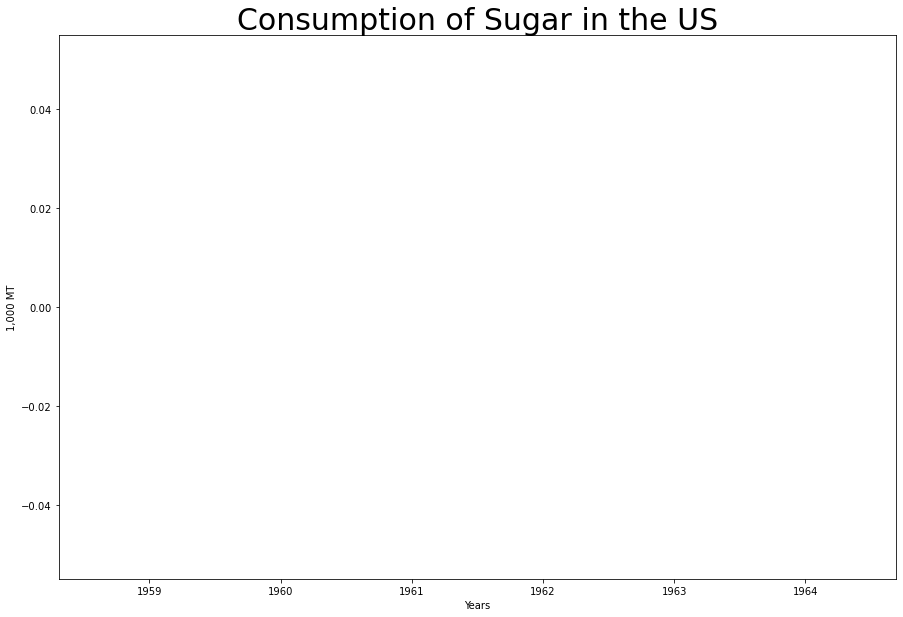

In [99]:
plt.bar(df_sugar_cons_FR.Calendar_Year, df_sugar_cons_FR.Value, linewidth=2)
plt.rcParams["figure.figsize"] = [15,10]
#plt.xticks(range(30))
plt.xlabel('Years')
plt.ylabel('1,000 MT')
plt.title('Consumption of Sugar in the US', size = 30)
plt.show()

In [90]:
df_sugar_cons_FR['Value'].value_counts()

0.0    5
Name: Value, dtype: int64

## let's look at India

In [96]:
df_sugar_cons_IN = df_sugar_cons[df_sugar_cons['Country_Name'] == 'India']
df_sugar_cons_IN

,Commodity_Code,Commodity_Description,Country_Code,Country_Name,Market_Year,Calendar_Year,Month,Attribute_ID,Attribute_Description,Unit_ID,Unit_Description,Value
60389,612000,"Sugar, Centrifugal",IN,India,1960,1959,0,139,Human Dom. Consumption,8,(1000 MT),2269.0
60405,612000,"Sugar, Centrifugal",IN,India,1961,1960,0,139,Human Dom. Consumption,8,(1000 MT),2513.0
60421,612000,"Sugar, Centrifugal",IN,India,1962,1961,0,139,Human Dom. Consumption,8,(1000 MT),2503.0
60437,612000,"Sugar, Centrifugal",IN,India,1963,1962,0,139,Human Dom. Consumption,8,(1000 MT),2833.0
60453,612000,"Sugar, Centrifugal",IN,India,1964,1963,0,139,Human Dom. Consumption,8,(1000 MT),2595.0
...,...,...,...,...,...,...,...,...,...,...,...,...
61301,612000,"Sugar, Centrifugal",IN,India,2017,2018,5,139,Human Dom. Consumption,8,(1000 MT),25500.0
61317,612000,"Sugar, Centrifugal",IN,India,2018,2019,5,139,Human Dom. Consumption,8,(1000 MT),26500.0
61333,612000,"Sugar, Centrifugal",IN,India,2019,2019,11,139,Human Dom. Consumption,8,(1000 MT),27500.0
61349,612000,"Sugar, Centrifugal",IN,India,2020,2020,11,139,Human Dom. Consumption,8,(1000 MT),27000.0


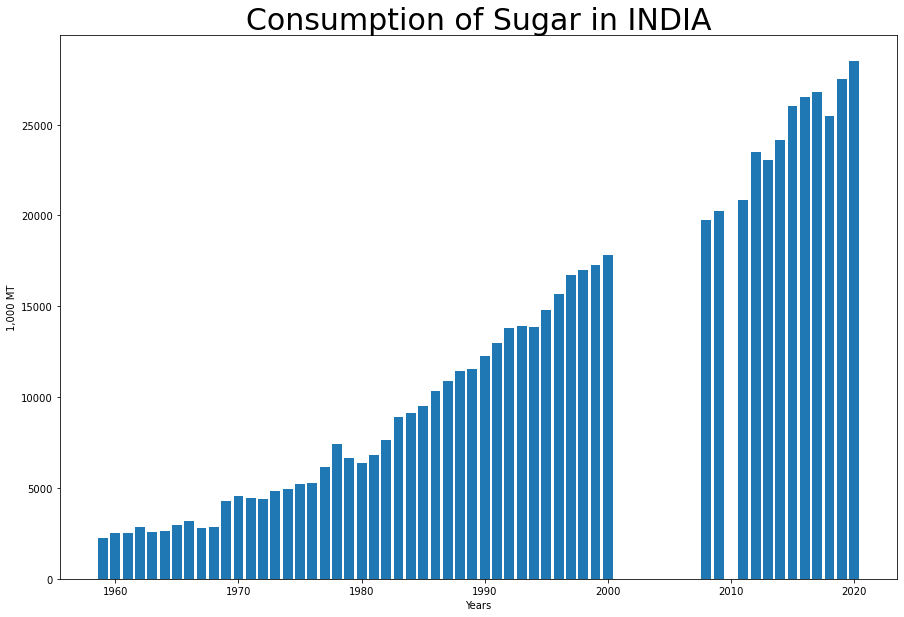

In [101]:
plt.bar(df_sugar_cons_IN.Calendar_Year, df_sugar_cons_IN.Value, linewidth=2)
plt.rcParams["figure.figsize"] = [15,10]
#plt.xticks(range(30))
plt.xlabel('Years')
plt.ylabel('1,000 MT')
plt.title('Consumption of Sugar in INDIA', size = 30)
plt.show()

## Subplot USA next to India

<BarContainer object of 62 artists>

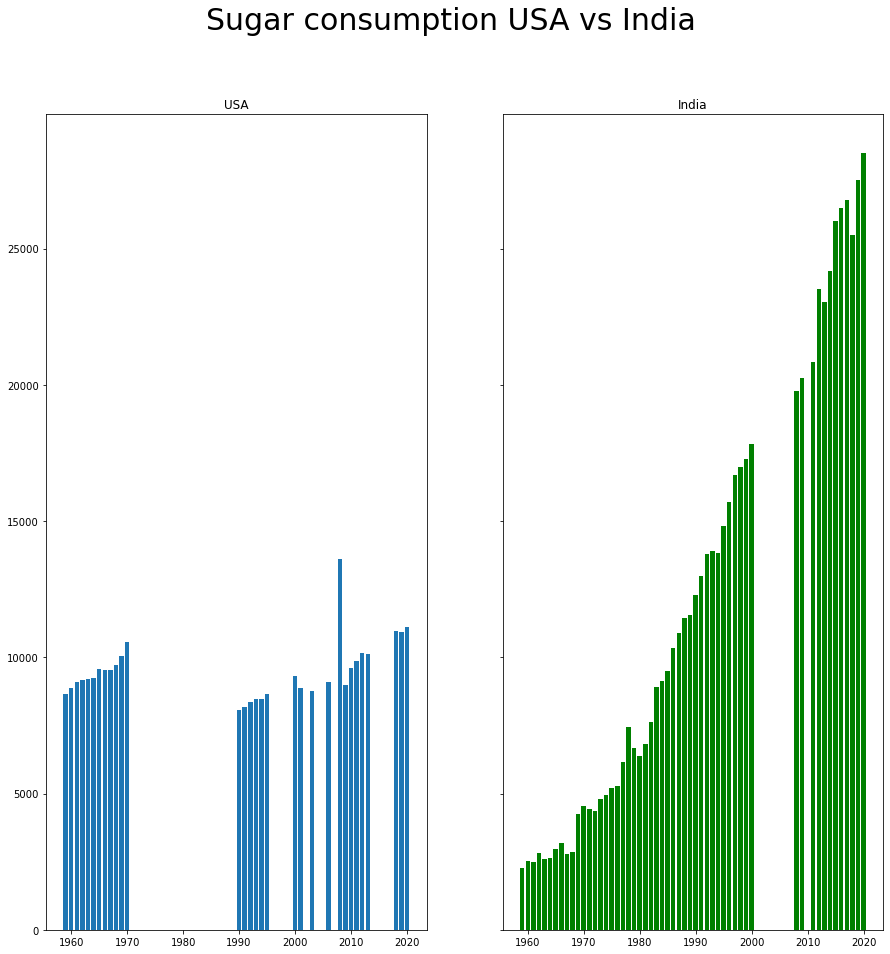

In [106]:
fig, ((ax1, ax2)) = plt.subplots(nrows = 1, ncols = 2, sharey = True, figsize = (15,15))
fig.suptitle('Sugar consumption USA vs India', size = 30)
ax1.set_title('USA')
ax1.bar(df_sugar_cons_USA.Calendar_Year, df_sugar_cons_USA.Value)

ax2.set_title('India')
ax2.bar(df_sugar_cons_IN.Calendar_Year, df_sugar_cons_IN.Value, color = 'green')



In [ ]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9), (ax10, ax11, ax12)) = plt.subplots(nrows = 4, ncols = 3, sharey=True, figsize=(15,15))
#fig.subplots_adjust(wspace=0.05)
#plt.figure(figsize=(25,45))
fig.suptitle('Number of Calls', fontsize=26)
ax1.set_title('Jan')
ax1.bar(jan.day, jan.number_calls)#, color='green',edgecolor='black', label='28,501')
#ax1.set_xticks(range(1,31, 1))

ax2.bar(feb.day, feb.number_calls)#, edgecolor='black', label='5,972,641')
ax2.set_title('Feb')
ax2.axvline(x=25, color='g')



ax8.axvline(x=7, color='red') # I added a vertical red bar here because they received the highest # of call -93-



#fig.text(0.48, -0.01, 'columns name', fontsize=20, ha='center')
#fig.text(0.04, 0.5, 'Count', va='center', rotation='vertical', fontsize=20)
#fig.legend(loc="upper left", fontsize=20)
#plt.axhline(y=350, linestyle='--', color='red', label = 'Weekday average')
#plt.axvline(x=38, color='red')
plt.yticks(fontsize=60)
#plt.xticks(rotation = 60)
plt.show();